In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001999,Male,Yes,2,Graduate,NaN,4912,4614.0,160.0,360.0,1.0,Rural,NaN
1,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y
2,LP001493,Male,Yes,2,Not Graduate,No,4200,1430.0,129.0,360.0,1.0,Rural,N
3,LP002842,Male,Yes,1,Graduate,No,3417,1750.0,186.0,360.0,1.0,Urban,Y
4,LP001228,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,N


In [7]:
df.sort_values(['Loan_ID']).reset_index(drop=True).head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
# no. of rows and columns
df.shape

(981, 13)

In [14]:
# statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [15]:
# no. of missing values
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [92]:
loan_dataset = df.dropna()
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Data vizualization

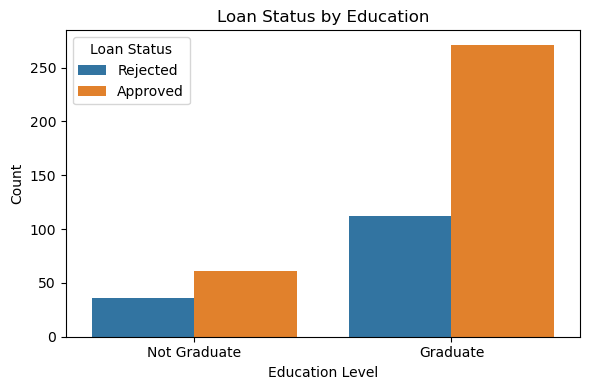

In [94]:
# Education status and loan status
plt.figure(figsize=(6,4))
sns.countplot(data=loan_dataset, x='Education', hue='Loan_Status', )
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
plt.title('Loan Status by Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

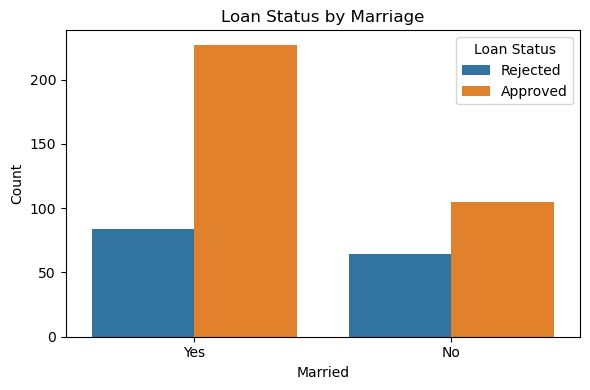

In [97]:
# Marital status and loan status
plt.figure(figsize=(6,4))
sns.countplot(data=loan_dataset, x='Married', hue='Loan_Status', )
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
plt.title('Loan Status by Marriage')
plt.xlabel('Married')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

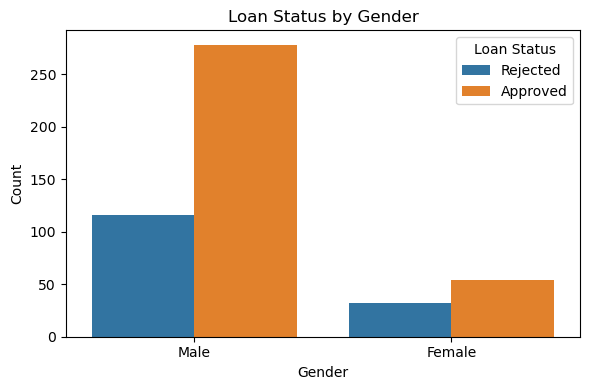

In [95]:
# Gender status and loan status
plt.figure(figsize=(6,4))
sns.countplot(data=loan_dataset, x='Gender', hue='Loan_Status', )
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

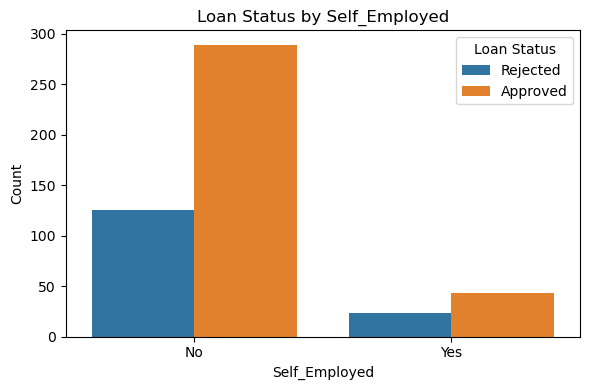

In [98]:
# Self-employment status and loan status
plt.figure(figsize=(6,4))
sns.countplot(data=loan_dataset, x='Self_Employed', hue='Loan_Status', )
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
plt.title('Loan Status by Self_Employed')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [99]:
# labeling loan status
loan_dataset = loan_dataset.copy()
loan_dataset['Loan_Status'] = loan_dataset['Loan_Status'].map({'N': 0, 'Y': 1}).astype('int')
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,LP001493,Male,Yes,2,Not Graduate,No,4200,1430.0,129.0,360.0,1.0,Rural,0
3,LP002842,Male,Yes,1,Graduate,No,3417,1750.0,186.0,360.0,1.0,Urban,1
4,LP001228,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,0
7,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,0
9,LP001994,Female,No,0,Graduate,No,2400,1863.0,104.0,360.0,0.0,Urban,0


In [101]:
# labeling married status
loan_dataset['Married'].value_counts()
loan_dataset.replace({'Married': {'Yes': 1, 'No': 0}}, inplace=True)
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,LP001493,Male,1,2,Not Graduate,No,4200,1430.0,129.0,360.0,1.0,Rural,0
3,LP002842,Male,1,1,Graduate,No,3417,1750.0,186.0,360.0,1.0,Urban,1
4,LP001228,Male,0,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,0
7,LP002990,Female,0,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,0
9,LP001994,Female,0,0,Graduate,No,2400,1863.0,104.0,360.0,0.0,Urban,0


In [102]:
# labeling dependents status
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [103]:
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,LP001493,Male,1,2,Not Graduate,No,4200,1430.0,129.0,360.0,1.0,Rural,0
3,LP002842,Male,1,1,Graduate,No,3417,1750.0,186.0,360.0,1.0,Urban,1
4,LP001228,Male,0,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,0
7,LP002990,Female,0,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,0
9,LP001994,Female,0,0,Graduate,No,2400,1863.0,104.0,360.0,0.0,Urban,0


In [104]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

In [106]:
# labeling categorical to numerical cols
loan_dataset.replace({'Married': {'Yes': 1, 'No': 0},
                      'Gender': {'Male': 1, 'Female': 0},
                      'Self_Employed': {'No': 0, 'Yes': 1},
                      'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
                      'Education': {'Graduate': 1, 'Not Graduate': 0}
                     }, inplace=True)
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,LP001493,1,1,2,0,0,4200,1430.0,129.0,360.0,1.0,0,0
3,LP002842,1,1,1,1,0,3417,1750.0,186.0,360.0,1.0,2,1
4,LP001228,1,0,0,0,0,3200,2254.0,126.0,180.0,0.0,2,0
7,LP002990,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1,0
9,LP001994,0,0,0,1,0,2400,1863.0,104.0,360.0,0.0,2,0


In [122]:
# Separating data and label
X = loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1).reset_index(drop=True)
y = loan_dataset['Loan_Status']

### Train, test, split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

### Training the model

In [129]:
classifier_model = svm.SVC(kernel='linear')

In [131]:
# training the model
classifier_model.fit(X_train, y_train)

SVC(kernel='linear')

### Model Evaluation

In [137]:
# accuracy on training data
y_train_pred = classifier_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy Score of training data: {train_accuracy}')

Accuracy Score of training data: 0.7939814814814815


In [136]:
# accuracy on testing data
y_test_pred = classifier_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy Score of testing data: {test_accuracy}')

Accuracy Score of testing data: 0.7916666666666666


### A diff approach without dropping most of the data

In [166]:
data = df[df['Loan_Status'].notnull()]
data = data.copy()
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [167]:
# Data dependents changing
data.Dependents.unique()

array(['0', '2', '1', '3+', nan], dtype=object)

In [172]:
data['Dependents'] = data['Dependents'].replace('3+', 3).astype('float')

In [173]:
data.Dependents.unique()

array([ 0.,  2.,  1.,  3., nan])

In [184]:
# Applying the mode on categorical data
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [182]:
# Applying the median on numerical data
num_cols = data.select_dtypes(include=['number']).columns.tolist()
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())

In [185]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [186]:
data.shape

(614, 13)

In [190]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP002588,Male,Yes,0.0,Graduate,No,4625,2857.0,111.0,12.0,1.0,Urban,Y
2,LP001493,Male,Yes,2.0,Not Graduate,No,4200,1430.0,129.0,360.0,1.0,Rural,N
3,LP002842,Male,Yes,1.0,Graduate,No,3417,1750.0,186.0,360.0,1.0,Urban,Y
4,LP001228,Male,No,0.0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,N
7,LP002990,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [197]:
# Changing the all the categorical columns to numerical
replace_cols = {
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
    'Loan_Status': {'Y': 1, 'N':0},
}
data = data.replace(replace_cols)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP002588,1,1,0.0,1,0,4625,2857.0,111.0,12.0,1.0,2,1
2,LP001493,1,1,2.0,0,0,4200,1430.0,129.0,360.0,1.0,0,0
3,LP002842,1,1,1.0,1,0,3417,1750.0,186.0,360.0,1.0,2,1
4,LP001228,1,0,0.0,0,0,3200,2254.0,126.0,180.0,0.0,2,0
7,LP002990,0,0,0.0,1,1,4583,0.0,133.0,360.0,0.0,1,0


In [200]:
# train, test split
X = data.drop(columns=['Loan_ID', 'Loan_Status'])
y = data['Loan_Status']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [205]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (491, 11) (123, 11)


In [206]:
# model selection - svm
classifier_model = svm.SVC(kernel='linear')

In [208]:
classifier_model.fit(X_train, y_train)

SVC(kernel='linear')

In [212]:
# model evaluation on trainig data
y_train_pred = classifier_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f'Accuracy score on training data: {train_acc}')

Accuracy score on training data: 0.7983706720977597


In [290]:
# model evaluation on testing data
y_test_pred = classifier_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Accuracy score on training data: {test_acc}')

Accuracy score on training data: 0.8048780487804879


### Building a predictive System

In [238]:
pd.set_option('future.no_silent_downcasting', True)

In [289]:
input_data = input().split(',')
input_df = pd.DataFrame([input_data], columns=df.columns[:-1])
input_df.replace('', np.nan, inplace=True)

input_df['Dependents'] = input_df['Dependents'].replace('3+', 3).astype('float')

for col in cat_cols:
    input_df[col] = input_df[col].fillna(data[col].mode()[0])

for col in num_cols:
    input_df[col] = input_df[col].fillna(data[col].median())    

input_df = input_df.replace(replace_cols)
input_df = input_df.drop(columns=['Loan_ID'], axis=1)

y_test_pred_input = classifier_model.predict(input_df)

if y_test_pred_input[0] == 1:
    print('Loan is approved.')
else:
    print('Loan is not approved.')

 LP002140,Male,No,0,Graduate,No,8750,4167.0,308.0,360.0,1.0,Rural


Loan is approved.
